## Data Preprocessing

In [254]:
!pip install scikit-learn

In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [256]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [257]:
df.shape

(506, 14)

In [258]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [259]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [260]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [261]:
df['AGE'].fillna(df['AGE'].mean().astype(int) ,inplace=True)
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

df.isna().sum()

In [262]:
df = df.dropna()
df['MEDV'].describe()

count    412.000000
mean      22.443932
std        9.348783
min        5.000000
25%       16.675000
50%       21.000000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

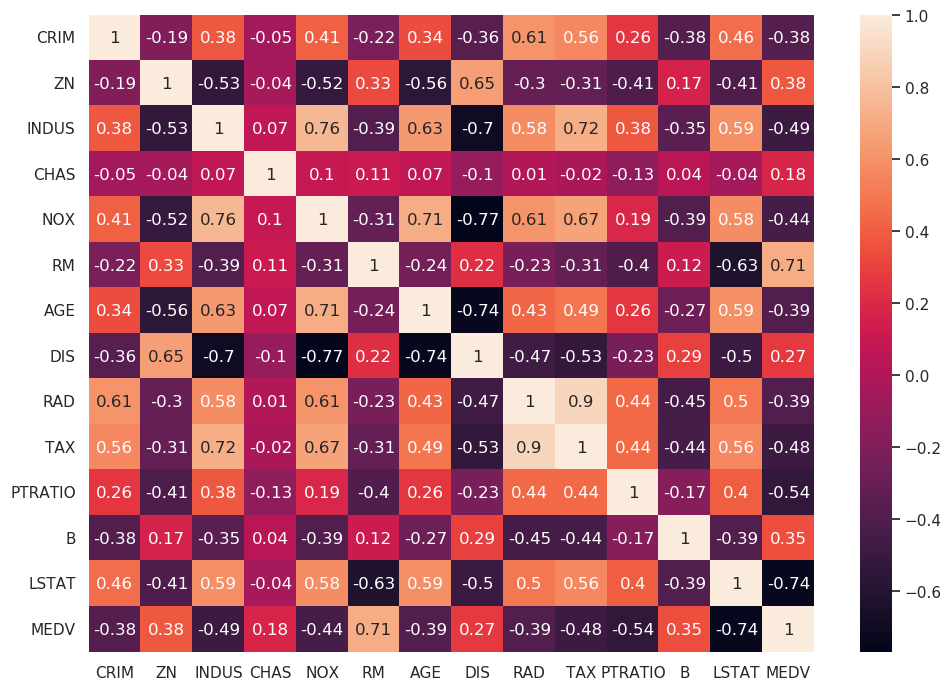

In [263]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data= correlation_matrix , annot=True)

CRIM: Per capita crime rate by town \
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft\
INDUS: Proportion of non-retail business acres per town\
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\
NOX: Nitric oxide concentration (parts per 10 million)\
RM: Average number of rooms per dwelling\
AGE: Proportion of owner-occupied units built prior to 1940\
DIS: Weighted distances to five Boston employment centers\
RAD: Index of accessibility to radial highways\
TAX: Full-value property tax rate per $10,000\
PTRATIO: Pupil-teacher ratio by town\
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town\
LSTAT: Percentage of lower status of the population\
MEDV: Median value of owner-occupied homes in $1000s\

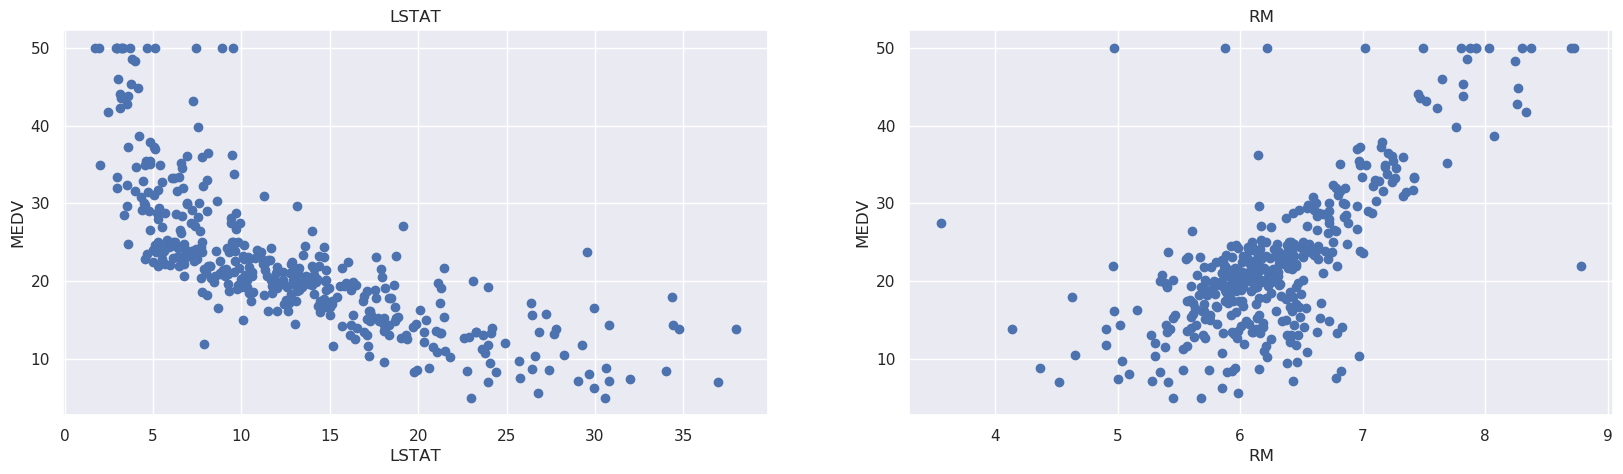

In [264]:
plt.figure(figsize=(20, 5))
features = ['LSTAT','RM']
target = df['MEDV']

for i,col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [265]:
df.shape

(412, 14)

In [266]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
X = df.drop(columns=['MEDV'])
Y = df['MEDV']

In [267]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(329, 13)
(83, 13)
(329,)
(83,)


In [268]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 


lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [269]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse**2))
print('R2 score is {}'.format(r2))
print("\n")


The model performance for training set
--------------------------------------
RMSE is 22.960069660252543
R2 score is 0.7548664063633159




In [270]:

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 3.8989755968280018
R2 score is 0.7504607634614922


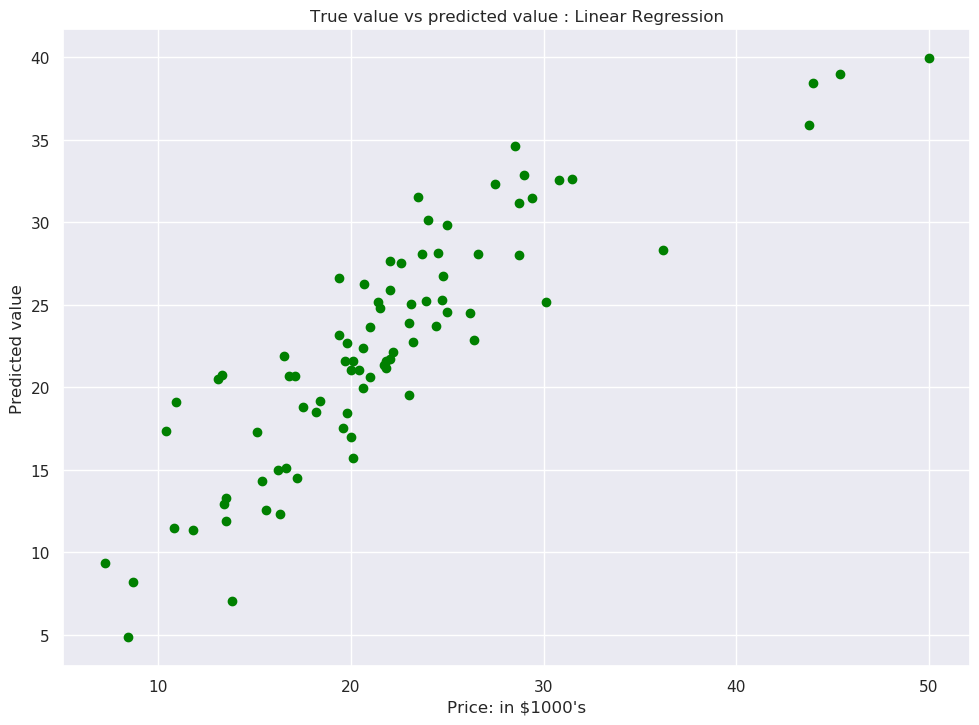

In [271]:

# Plotting Scatter graph to show the prediction 
# results - 'ytrue' value vs 'y_pred' value
plt.scatter(Y_test, y_test_predict, c = 'green')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()


In [272]:
print ('Estimated intercept coefficient:', lin_model.intercept_)

Estimated intercept coefficient: 37.50041014591914


In [276]:
print ('Slope :', (lin_model.coef_[0]))

Number of coefficients: -0.07617301704940288
